<a href="https://colab.research.google.com/github/NaufalPratomo/PCVK_Ganjil_2025/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

**Membuat Gamma Correction**

Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


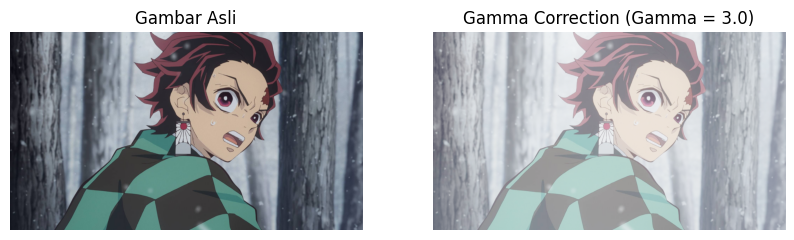

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Potongan Kode dari Modul ---
print('Gamma Correction pada citra ')
print('-----------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: ')) # Menggunakan float untuk menerima nilai desimal
except ValueError:
    print('Error, not a number')
# ------------------------------------

# Langkah 1: Membaca gambar
try:
    img = cv2.imread('gambar1.tiff')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Konversi ke RGB untuk plotting
except:
    print("Gambar tidak ditemukan. Pastikan path gambar benar.")
    exit()

# Langkah 2: Membuat tabel lookup (look-up table) untuk efisiensi

inv_gamma = 1.0 / gamma
table = np.array([((i / 255.0) ** inv_gamma) * 255
                  for i in np.arange(0, 256)]).astype("uint8")

# Langkah 3: Terapkan gamma correction menggunakan tabel lookup
gamma_corrected_img = cv2.LUT(img, table)

# Langkah 4: Tampilkan gambar asli dan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_img)
plt.title(f'Gamma Correction (Gamma = {gamma})')
plt.axis('off')

plt.show()

**Simulasi Image Depth**

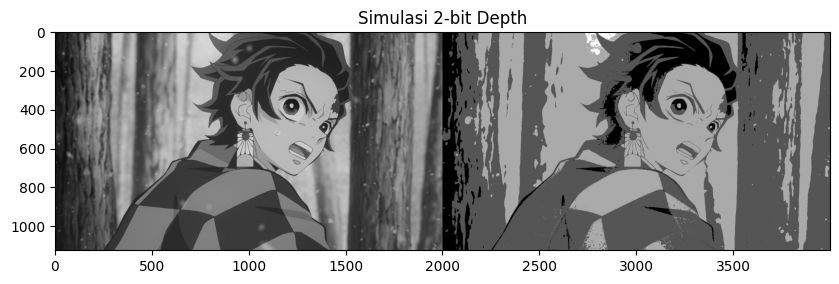

In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Langkah 1: Tentukan bit depth yang diinginkan
bit_depth = 2

# Langkah 2: Hitung level kuantisasi
level = 255 / (math.pow(2, bit_depth) - 1)

# Langkah 3: Baca gambar dalam mode grayscale
try:
    original = cv2.imread('gambar1.tiff', cv2.IMREAD_GRAYSCALE)
except:
    print("Gambar 'gambar1.tiff' tidak ditemukan.")
    exit()

# Langkah 4: Siapkan citra keluaran
# np.zeros_like(original) lebih ringkas
depth_image = np.zeros_like(original)

# Langkah 5: Terapkan rumus kuantisasi untuk setiap piksel
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # Rumus C' = round((C / level)) * level
        new_value = round(original[i, j] / level) * level
        depth_image[i, j] = new_value

# Langkah 6: Tampilkan gambar asli dan hasil
plt.figure(figsize=(10, 5))
# np.hstack menggabungkan dua gambar secara horizontal
combined_image = np.hstack((original, depth_image))
plt.imshow(combined_image, cmap='gray')
plt.title(f'Simulasi {bit_depth}-bit Depth')
plt.show()

**Average Denoising**

Mencari gambar bernoise di folder: 'noises/*.jpg'...
✅ Berhasil memuat dan menyamakan ukuran 5 gambar bernoise.

Memulai proses average denoising...
Jumlah Citra: 5, Nilai PSNR: 27.69 dB

--- TABEL HASIL PSNR ---
| No | Jumlah Citra | Nilai PSNR (dB) |
|----|--------------|-----------------|
| 1. | 5            | 27.6881         |

Menampilkan plot perbandingan gambar...


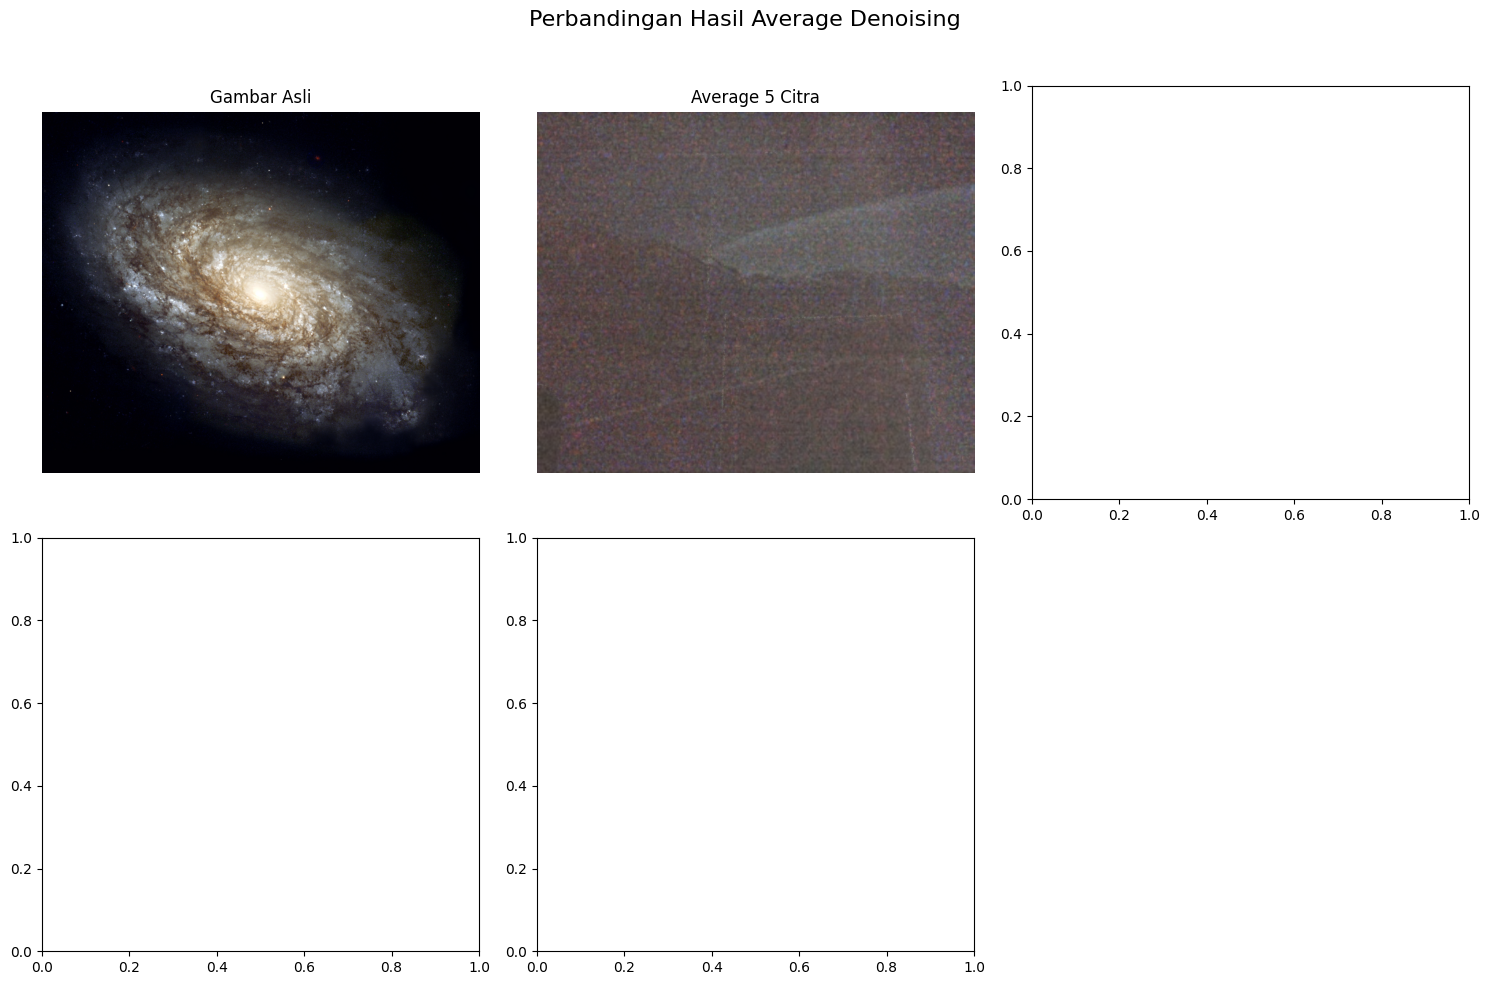


--- Selesai ---


In [6]:
# -------------------------------------------------------------
# TUGAS 3: AVERAGE DENOISING - KODE FINAL (FORMAT OUTPUT AWAL)
# -------------------------------------------------------------

import cv2
import numpy as np
import glob
import math
import matplotlib.pyplot as plt

def calculate_psnr(img1, img2):
    """
    Fungsi untuk menghitung PSNR sesuai rumus di modul.
    """
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# --- 1. MEMUAT SEMUA GAMBAR YANG DIBUTUHKAN ---

# Membaca citra asli
try:
    original_img = cv2.imread('galaxy.jpg')
    if original_img is None:
        raise FileNotFoundError
except FileNotFoundError:
    print("❌ ERROR: File 'galaxy.jpg' tidak ditemukan.")
    exit()

# Mengambil dimensi dari gambar asli untuk dijadikan acuan
h, w = original_img.shape[:2]

# Membaca semua citra bernoise
noisy_images_path = 'noises/*.jpg'
print(f"Mencari gambar bernoise di folder: '{noisy_images_path}'...")

cv_img = []
for img_path in glob.glob(noisy_images_path):
    n = cv2.imread(img_path)
    if n is not None:
        # Memastikan semua gambar bernoise memiliki ukuran yang sama dengan gambar asli
        n_resized = cv2.resize(n, (w, h))
        cv_img.append(n_resized)

if not cv_img:
    print("❌ ERROR: Tidak ada gambar bernoise yang ditemukan.")
    exit()
else:
    print(f"✅ Berhasil memuat dan menyamakan ukuran {len(cv_img)} gambar bernoise.")


# --- 2. PROSES AVERAGING DAN PERHITUNGAN PSNR ---

num_images_to_average = [5, 10, 20, 40, 80, 100]
psnr_results = []
image_results = {}

print("\nMemulai proses average denoising...")

for count in num_images_to_average:
    if len(cv_img) < count:
        break
    images_to_process = cv_img[:count]
    sum_of_images = np.zeros(images_to_process[0].shape, dtype=np.float64)
    for img in images_to_process:
        sum_of_images += img.astype(np.float64)
    averaged_image = (sum_of_images / count).astype(np.uint8)
    image_results[count] = averaged_image
    psnr = calculate_psnr(original_img, averaged_image)
    psnr_results.append((count, psnr))
    print(f"Jumlah Citra: {count}, Nilai PSNR: {psnr:.2f} dB")


# --- 3. MENAMPILKAN HASIL DALAM FORMAT AWAL ---

# Menampilkan tabel hasil PSNR di konsol
print("\n--- TABEL HASIL PSNR ---")
print("| No | Jumlah Citra | Nilai PSNR (dB) |")
print("|----|--------------|-----------------|")
for i, (count, psnr) in enumerate(psnr_results):
    print(f"| {i+1}. | {count:<12} | {psnr:<15.4f} |")

# Menampilkan perbandingan gambar secara visual di jendela terpisah
print("\nMenampilkan plot perbandingan gambar...")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Perbandingan Hasil Average Denoising', fontsize=16)

# Tampilkan gambar asli
axes[0, 0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Gambar Asli')
axes[0, 0].axis('off')

# Tampilkan beberapa hasil utama (seperti di modul)
key_counts = [5, 20, 50, 100]
plot_positions = [(0, 1), (0, 2), (1, 0), (1, 1)]

for (count, pos) in zip(key_counts, plot_positions):
    if count in image_results:
        img_to_show = image_results[count]
        axes[pos].imshow(cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB))
        axes[pos].set_title(f'Average {count} Citra')
        axes[pos].axis('off')

# Sembunyikan subplot yang tidak terpakai
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n--- Selesai ---")

**Image Masking**

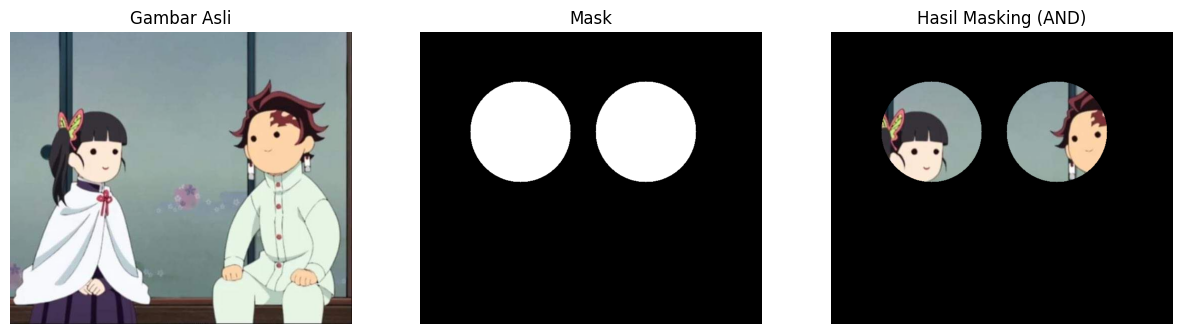

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Baca gambar asli
try:
    img_couple = cv2.imread('couple.tiff')
    img_couple = cv2.cvtColor(img_couple, cv2.COLOR_BGR2RGB)
except:
    print("Gambar 'couple.tiff' tidak ditemukan.")
    exit()

# Langkah 2: Buat gambar mask hitam seukuran gambar asli
mask = np.zeros(img_couple.shape[:2], dtype="uint8")

# Langkah 3: Gambar dua lingkaran putih pada mask
# Koordinat (x, y) dan radius (r) ini adalah perkiraan dari contoh gambar
# Lingkaran 1
cv2.circle(mask, (200, 200), 100, 255, -1) # (center_x, center_y), radius, color, thickness (-1 for filled)
# Lingkaran 2
cv2.circle(mask, (450, 200), 100, 255, -1)

# Langkah 4: Terapkan mask ke gambar asli menggunakan bitwise_and
masked_img = cv2.bitwise_and(img_couple, img_couple, mask=mask)

# Langkah 5: Tampilkan hasilnya
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_couple)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(masked_img)
plt.title('Hasil Masking (AND)')
plt.axis('off')

plt.show()

**Percobaan Operator Logika Lainnya**

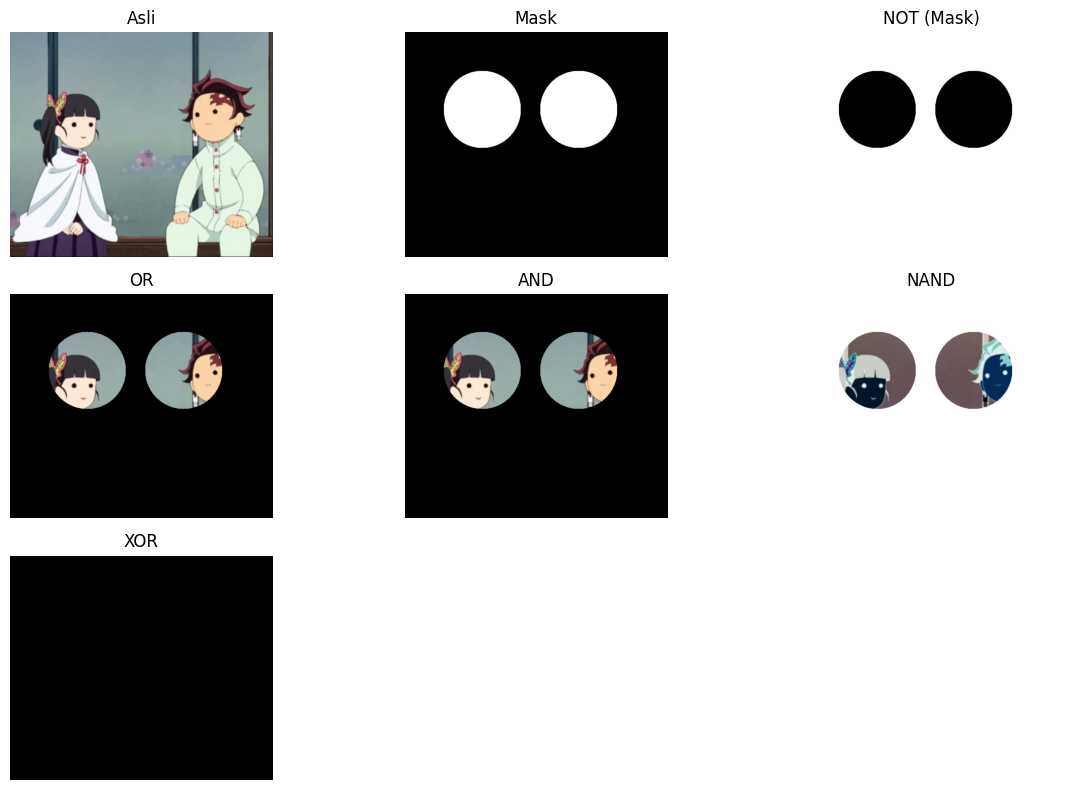

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gunakan gambar dan mask dari Tugas 4

# Operasi NOT (Komplemen)
not_mask = cv2.bitwise_not(mask)
not_image = cv2.bitwise_not(img_couple)

# Operasi OR
or_result = cv2.bitwise_or(img_couple, img_couple, mask=mask) # Contoh OR dengan mask

# Operasi AND (sudah dilakukan di Tugas 4)
and_result = cv2.bitwise_and(img_couple, img_couple, mask=mask)

# Operasi NAND (NOT AND)
nand_result = cv2.bitwise_not(and_result)

# Operasi XOR
xor_result = cv2.bitwise_xor(img_couple, img_couple, mask=mask) # Contoh XOR dengan mask

# Menampilkan semua hasil
titles = ['Asli', 'Mask', 'NOT (Mask)', 'OR', 'AND', 'NAND', 'XOR']
images = [img_couple, mask, not_mask, or_result, and_result, nand_result, xor_result]

plt.figure(figsize=(12, 8))
for i in range(7):
    plt.subplot(3, 3, i + 1)
    # Tampilkan gambar mask dalam grayscale
    if titles[i] in ['Mask', 'NOT (Mask)']:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()